In [ ]:
import pandas as pd

df = pd.read_csv("file.csv")
df.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1
5,23.7600,26.260,568.666667,790.000000,0.004779,1
6,23.7300,26.290,536.333333,798.000000,0.004776,1
7,23.7540,26.290,509.000000,797.000000,0.004783,1
8,23.7540,26.350,476.000000,803.200000,0.004794,1
9,23.7360,26.390,510.000000,809.000000,0.004796,1


In [ ]:
df.shape

(2665, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [ ]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


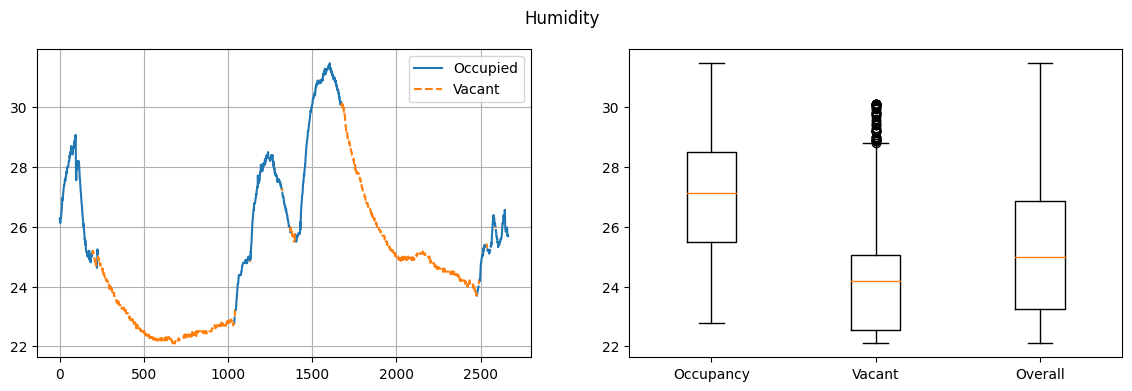

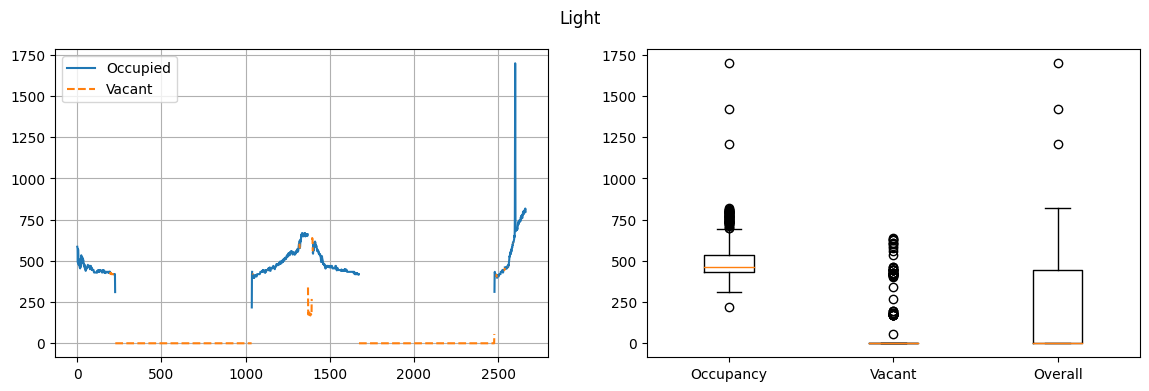

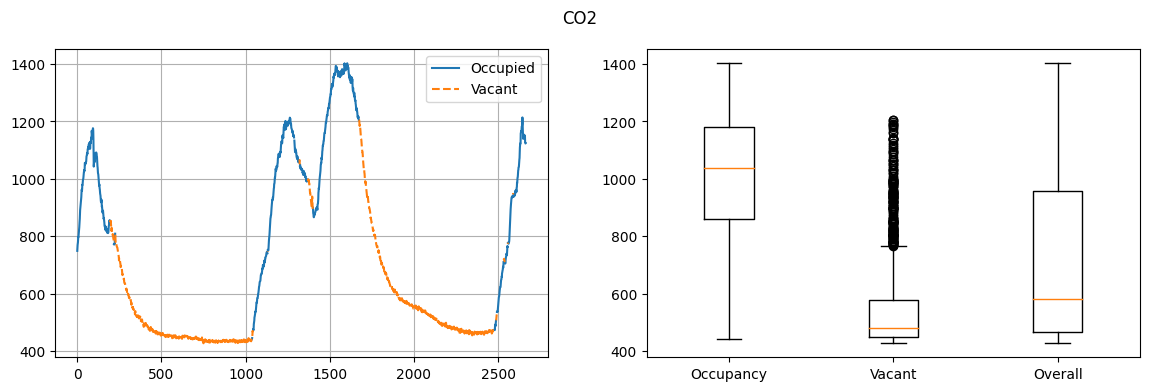

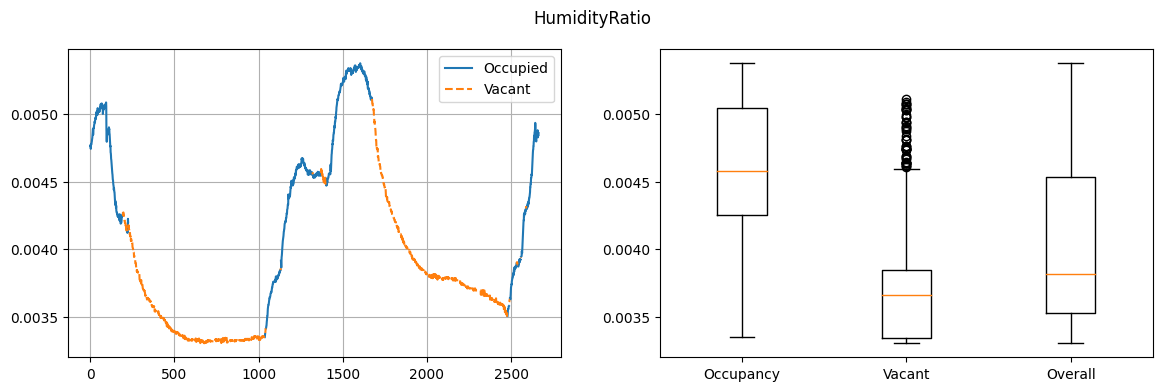

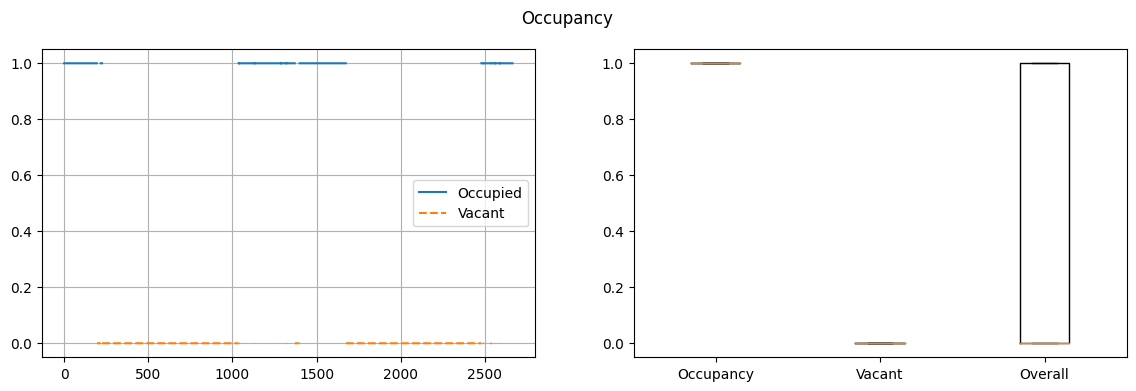

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def occupancy_plot(df, Ml):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    
    fig.suptitle(Ml)
    ax1.plot(np.where(df.Occupancy==1, df[Ml], None), label='Occupied')
    ax1.plot(np.where(df.Occupancy==0, df[Ml], None), label='Vacant', ls='--')
    ax1.grid()
    ax1.legend()
    
    ax2.boxplot([df[Ml][df.Occupancy==1], df[Ml][df.Occupancy==0], df[Ml]])
    ax2.set_xticklabels(['Occupancy', 'Vacant', 'Overall'])


for i in range(1, 6):
    occupancy_plot(df, df.columns[i])

In [ ]:
df2 = df
df2 = df2[np.abs(df2.Temperature - df2.Temperature.mean()) <= 3*df2.Temperature.std()]
print("1. Removing the Outliers on 'Temperature' has reduced the data size from {} to {}.".format(len(df), len(df2)))
print("\n")
df = df2[np.abs(df2.Light - df2.Light.mean()) <= 3*df2.Light.std()]
print("2. Removing the Outliers on 'Light' has reduced the data size from {} to {}.".format(len(df2), len(df)))
print("\n")
df2 = df[np.abs(df.CO2 - df.CO2.mean()) <= 3*df2.CO2.std()]
print("3. Removing the Outliers on 'CO2' has reduced the data size from {} to {}.".format(len(df), len(df2)))
print("\n")

1. Removing the Outliers on 'Temperature' has reduced the data size from 2665 to 2665.


2. Removing the Outliers on 'Light' has reduced the data size from 2665 to 2662.


3. Removing the Outliers on 'CO2' has reduced the data size from 2662 to 2662.




In [ ]:
df2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000
mean,21.432487,25.353799,191.820017,717.642897,0.004027,0.364012
std,1.027768,2.438212,246.719570,292.741171,0.000611,0.481242
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003528,0.000000
50%,20.890000,25.000000,0.000000,579.600000,0.003815,0.000000
75%,22.345000,26.866667,442.500000,956.312500,0.004532,1.000000
max,24.408333,31.472500,817.000000,1402.250000,0.005378,1.000000


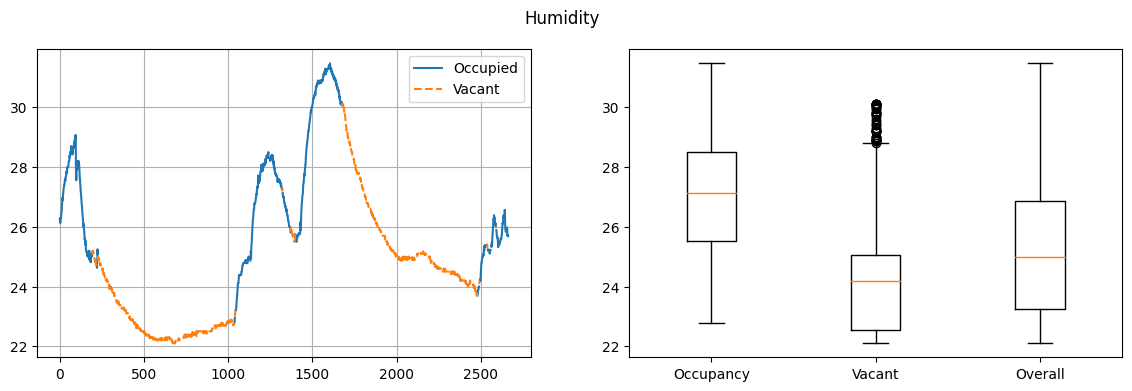

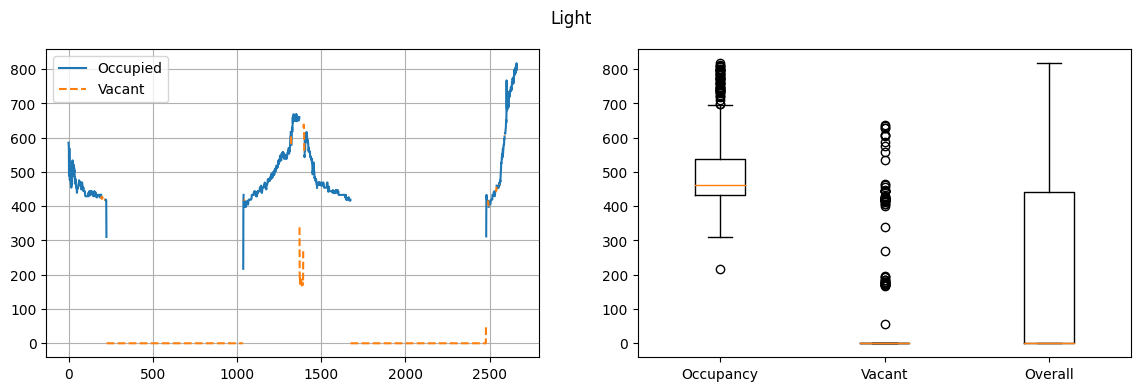

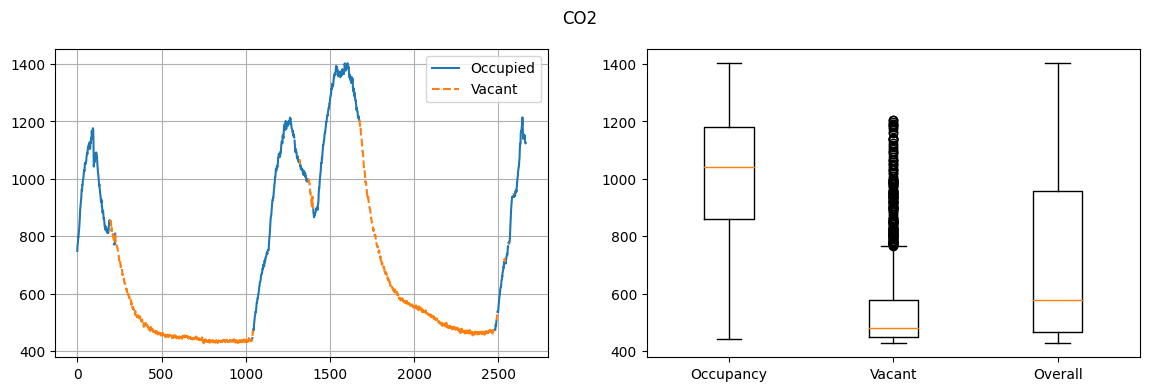

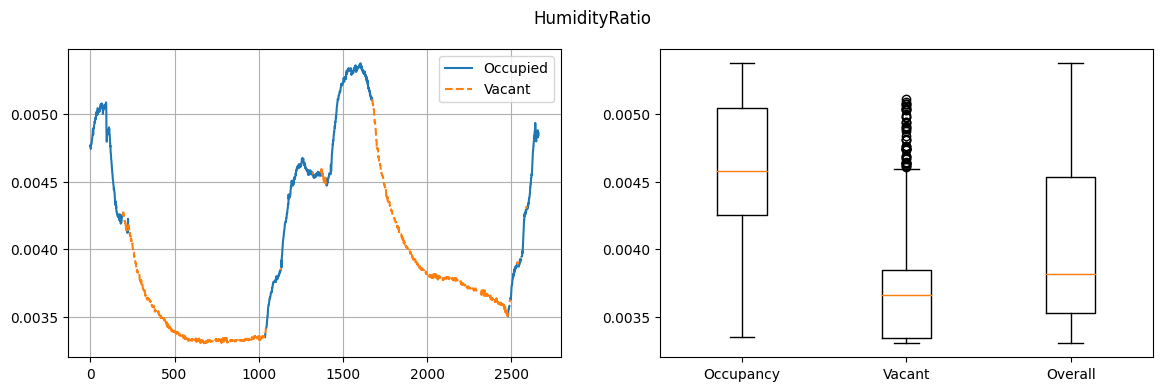

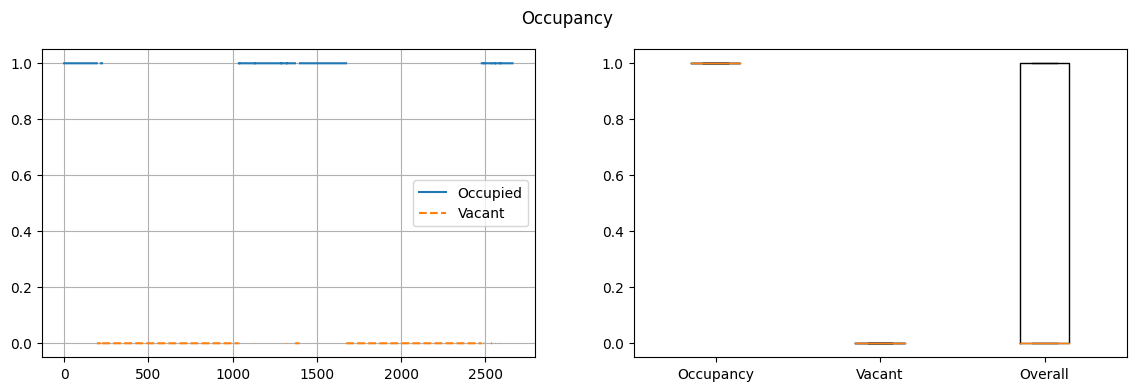

In [ ]:
for i in range(1, 6):
    occupancy_plot(df2, df2.columns[i])

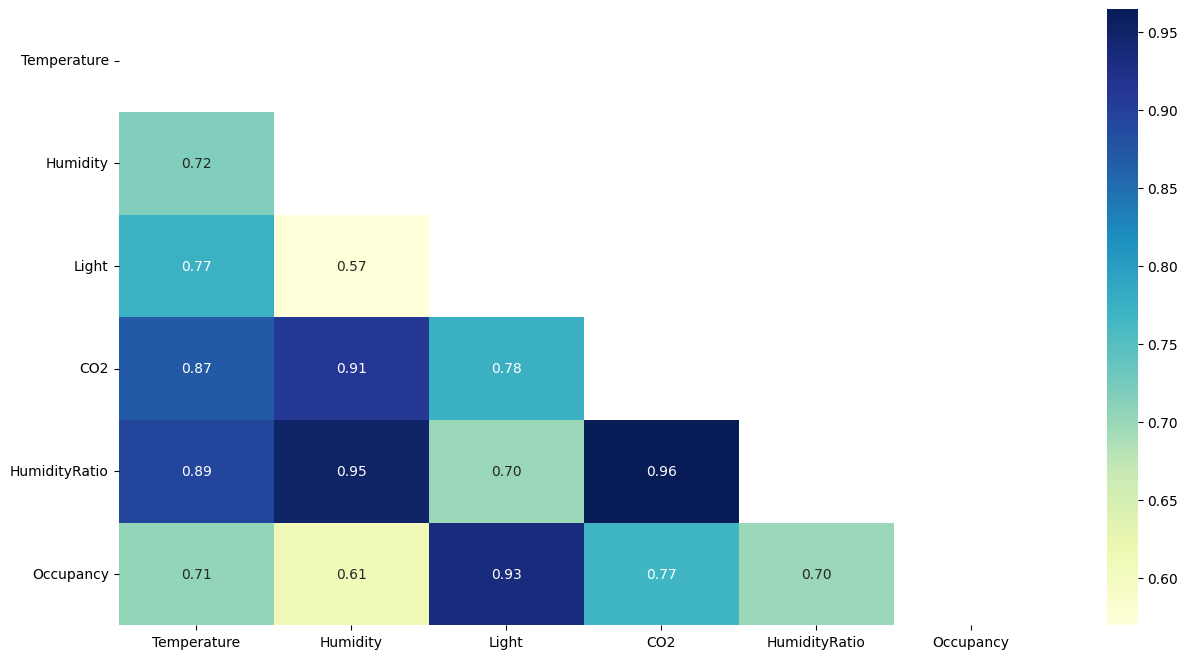

In [ ]:
import seaborn as sns

mask = np.triu(np.ones_like(df2.corr()))
plt.figure(figsize = (15,8))
sns.heatmap(df2.corr(),annot=True, fmt="1.2f", mask=mask, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X, Y = df2.iloc[:,1:-1], df2.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)
lr_score_train = lr.score(X_train, Y_train)
lr_score_test = lr.score(X_test, Y_test)
print("Accuracy score on training data: {:.3f}%".format(lr_score_train * 100))
print("Accuracy score on testing data: {:.3f}%".format(lr_score_test * 100))

Accuracy score on training data: 97.695%
Accuracy score on testing data: 98.348%


In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
knn_score_test = knn.score(X_test, Y_test)
knn_score_train = knn.score(X_train, Y_train)
knn_score_test = knn.score(X_test, Y_test)
print("Accuracy score on training data: {:.3f}%".format(knn_score_train * 100))
print("Accuracy score on testing data: {:.3f}%".format(knn_score_test * 100))

Accuracy score on training data: 98.798%
Accuracy score on testing data: 98.949%


In [146]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, Y_train)
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)
svm_score_train = svm.score(X_train, Y_train)
svm_score_test = svm.score(X_test, Y_test)
print("Accuracy score on training data: {:.3f}%".format(svm_score_train * 100))
print("Accuracy score on testing data: {:.3f}%".format(svm_score_test * 100))

Accuracy score on training data: 97.745%
Accuracy score on testing data: 98.348%


In [147]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', C=1, random_state=0)
svm.fit(X_train, Y_train)
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)
svm_score_train = svm.score(X_train, Y_train)
svm_score_test = svm.score(X_test, Y_test)
print("Accuracy score on training data: {:.3f}%".format(svm_score_train * 100))
print("Accuracy score on testing data: {:.3f}%".format(svm_score_test * 100))

Accuracy score on training data: 97.645%
Accuracy score on testing data: 98.348%


In [148]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, random_state=0)
svm.fit(X_train, Y_train)
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)
svm_score_train = svm.score(X_train, Y_train)
svm_score_test = svm.score(X_test, Y_test)
print("Accuracy score on training data: {:.3f}%".format(svm_score_train * 100))
print("Accuracy score on testing data: {:.3f}%".format(svm_score_test * 100))

Accuracy score on training data: 97.796%
Accuracy score on testing data: 98.348%


In [152]:
 #Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)
Y_pred_test = dt.predict(X_test)
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test)
dt_score_train = dt.score(X_train, Y_train)
dt_score_test = dt.score(X_test, Y_test)
print("Accuracy score on training data: {:.2f}%".format(dt_score_train * 100))
print("Accuracy score on testing data: {:.2f}%".format(dt_score_test * 100))

Accuracy score on training data: 99.00%
Accuracy score on testing data: 99.10%


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
params = {'n_estimators': [100, 200, 500],
          'max_depth': [10,15,20]}
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)
rfc = grid_search.best_estimator_
rfc.fit(X_train, Y_train)

Y_pred_train = rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

rfc_score_train = rfc.score(X_train, Y_train)
rfc_score_test = rfc.score(X_test, Y_test)

print("Accuracy score on training data: {:.2f}%".format(rfc_score_train * 100))
print("Accuracy score on testing data: {:.2f}%".format(rfc_score_test * 100))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Accuracy score on training data: 100.00%
Accuracy score on testing data: 98.80%


In [154]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, Y_train)
Y_pred_train = gb.predict(X_train)
Y_pred_test = gb.predict(X_test)

gb_score_train = gb.score(X_train, Y_train)

gb_score_test = gb.score(X_test, Y_test)

print("Accuracy score on training data: {:.2f}%".format(gb_score_train * 100))

print("Accuracy score on testing data: {:.2f}%".format(gb_score_test * 100))


Accuracy score on training data: 99.80%
Accuracy score on testing data: 98.95%


In [165]:
import pandas as pd

# create the data
data = {
    'model': [1,2,3,4,5,6],
    'Classifiers': ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', ' GradientBoostingClassifier'],
    'training accuracy(%)': [97.695,98.798,97.745,99.001,100.00,99.801],
    'testing accuracy(%)': [98.348,98.949,98.348,99.101,98.801,98.951]
}

# create the dataframe
df2 = pd.DataFrame(data)

# display the dataframe as a markdown table
print(df2.to_markdown(index=False))

|   model | Classifiers                |   training accuracy(%) |   testing accuracy(%) |
|--------:|:---------------------------|-----------------------:|----------------------:|
|       1 | LogisticRegression         |                 97.695 |                98.348 |
|       2 | KNeighborsClassifier       |                 98.798 |                98.949 |
|       3 | SVC                        |                 97.745 |                98.348 |
|       4 | DecisionTreeClassifier     |                 99.001 |                99.101 |
|       5 | RandomForestClassifier     |                100     |                98.801 |
|       6 | GradientBoostingClassifier |                 99.801 |                98.951 |
